In [1]:
# you can pip install from the shell, or use sys to execute pip install within jupyter
import sys
!{sys.executable} -m pip install htrc-feature-reader

In [2]:
from htrc_features import FeatureReader
import pandas as pd
import glob
%matplotlib inline

# multiple volumes

In [3]:
paths = glob.glob("erdrich\\*.json.bz2") #this may be a PC thing to have '\\' rather than '/'
fr = FeatureReader(paths)
for vol in fr.volumes():
    print(vol.title)

None
['erdrich\\inu.30000039114859.json.bz2', 'erdrich\\inu.30000041114236.json.bz2', 'erdrich\\mdp.39015010832841.json.bz2', 'erdrich\\mdp.39015031716551.json.bz2', 'erdrich\\mdp.39015031818787.json.bz2', 'erdrich\\mdp.39015034038862.json.bz2', 'erdrich\\mdp.39015040036579.json.bz2', 'erdrich\\mdp.39015048567476.json.bz2', 'erdrich\\mdp.39015048771235.json.bz2', 'erdrich\\mdp.39015054189942.json.bz2', 'erdrich\\mdp.39015056813671.json.bz2', 'erdrich\\mdp.49015002565050.json.bz2', 'erdrich\\mdp.49015002568237.json.bz2', 'erdrich\\uc1.32106017511640.json.bz2']
Route 2 / Louise Erdrich and Michael Dorris.
The falcon : a narrative of the captivity and adventures of John Tanner / with an introduction by Louise Erdrich.
Love medicine : a novel / by Louise Erdrich.
The blue jay's dance : a birth year / Louise Erdrich.
The bingo palace / Louise Erdrich.
The blue jay's dance : a birth year / Louise Erdrich.
The antelope wife : a novel / Louise Erdrich.
The birchbark house / Louise Erdrich with

In [4]:
#if you're looking at the uncompressed JSON file for one book use the parameter 'compressed=False'
#fr = FeatureReader(paths, compressed=False)
for vol in fr.volumes():
    print(vol.id, '\n', vol.title, '\n', vol.author)
    print()

inu.30000039114859 
 Route 2 / Louise Erdrich and Michael Dorris. 
 ['Erdrich, Louise. ', 'Dorris, Michael. ']

inu.30000041114236 
 The falcon : a narrative of the captivity and adventures of John Tanner / with an introduction by Louise Erdrich. 
 ['Tanner, John 1780?-1847 ', 'Erdrich, Louise. ']

mdp.39015010832841 
 Love medicine : a novel / by Louise Erdrich. 
 ['Erdrich, Louise. ']

mdp.39015031716551 
 The blue jay's dance : a birth year / Louise Erdrich. 
 ['Erdrich, Louise. ']

mdp.39015031818787 
 The bingo palace / Louise Erdrich. 
 ['Erdrich, Louise. ']

mdp.39015034038862 
 The blue jay's dance : a birth year / Louise Erdrich. 
 ['Erdrich, Louise. ']

mdp.39015040036579 
 The antelope wife : a novel / Louise Erdrich. 
 ['Erdrich, Louise. ']

mdp.39015048567476 
 The birchbark house / Louise Erdrich with illustrations by the author. 
 ['Erdrich, Louise. ']

mdp.39015048771235 
 The broom closet : secret meanings of domesticity in postfeminist novels by Louise Erdrich, Mary G

In [5]:
for vol in fr.volumes():
    print("Source institution: %s " % (vol.source_institution))

Source institution: INU 
Source institution: INU 
Source institution: MIU 
Source institution: MIU 
Source institution: MIU 
Source institution: MIU 
Source institution: MIU 
Source institution: MIU 
Source institution: MIU 
Source institution: MIU 
Source institution: MIU 
Source institution: MIU 
Source institution: MIU 
Source institution: UC 


Selecting a single volume

In [8]:
vol = fr.first()
vol.title

'Route 2 / Louise Erdrich and Michael Dorris.'

In [9]:
tokens = vol.tokens_per_page()
tokens.head()

page
1    0
2    0
3    0
4    0
5    0
Name: tokenCount, dtype: int64

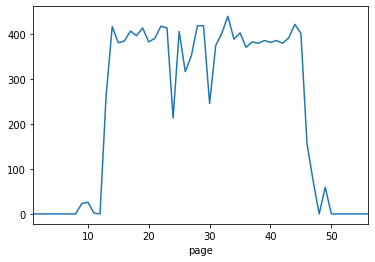

In [10]:
tokens.plot()

In [11]:
pages = [page for page in vol.pages()]

In [12]:
# this book only has 56 pages so I changed all 'page_100's to 'page_25' going forward
#page_100 = pages[99]
page_25 = pages[24]

In [13]:
print("The body has %s lines, %s empty lines, and %s sentences" % (page_25.line_count(),
                                                                   page_25.empty_line_count(),
                                                                   page_25.sentence_count()))

The body has 32 lines, 0 empty lines, and 14 sentences


In [14]:
page_25.tokenlist().reset_index()

,page,section,token,pos,count
0,25,body,"""",'',1
1,25,body,"""",``,1
2,25,body,'oeuvres,.,1
3,25,body,'s,POS,7
4,25,body,",",",",43
...,...,...,...,...,...
243,25,body,whose,WP$,1
244,25,body,wind,VBP,1
245,25,body,wishes,NNS,1
246,25,body,with,IN,2


In [15]:
all_pages_meta = pd.concat([p.tokenlist().reset_index() for p in pages], sort=False)
all_pages_meta.head()

,page,section,token,pos,count
0,9.0,body,",",",",1
1,9.0,body,9,CD,2
2,9.0,body,=,SYM,2
3,9.0,body,BLOOMINGTON,NN,1
4,9.0,body,California,NNP,1


In [16]:
token_count = all_pages_meta.groupby(['token']).count()[['count']]

In [17]:
token_count.sort_values(by='count', ascending=False)[0:20]

,count
token,
"""",53
that,52
and,38
",",38
of,36
.,36
the,36
in,35
a,35


In [19]:
#the following cell was not running but worked after I ran these lines. (Found at https://www.nltk.org/data.html)
import nltk
nltk.download()
#it probably isn't necessary to download the whole package? (I did)

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

In [22]:
import string
punctuation = string.punctuation
from nltk.corpus import stopwords
stop = stopwords.words('english')

In [25]:
token_count.index = [word.strip(string.punctuation).lower() for word in token_count.index]
token_count.index

Index(['', '—it', '', 'apple', 'before', 'family', 'females', 'foreign',
       'forever', 'heart',
       ...
       'younger', 'your', 'zone', 'zoo', '©', '®', '—', '—', '—fast', '—soon'],
      dtype='object', length=3965)

In [9]:
pd.read_csv('MNauthors-ianr.csv')

,id,title,year,language,authors
0,mdp.39015064761722,The translation of Dr. Apelles : a love story ...,2006,eng,"Treuer, David"
1,mdp.39015054189942,Tracks : a novel / by Louise Erdrich.,1988,eng,"Erdrich, Louise"
2,mdp.39015062522845,The mother's tongue / Heid E. Erdrich.,2005,eng,"Erdrich, Heid E. (Heid Ellen)"
3,inu.30000039114859,Route 2 / Louise Erdrich and Michael Dorris.,1991,eng,"Erdrich, Louise; Dorris, Michael"
4,mdp.39015031818787,The bingo palace / Louise Erdrich.,1994,eng,"Erdrich, Louise"
5,mdp.49015002568237,Grandmother's pigeon / Louise Erdrich ; illust...,1996,eng,"Erdrich, Louise; LaMarche, Jim ill"
6,mdp.39015048567476,The birchbark house / Louise Erdrich with illu...,1999,eng,"Erdrich, Louise"
7,mdp.39015041056824,Fishing for myth : poems / by Heid E. Erdrich.,1997,eng,"Erdrich, Heid E. (Heid Ellen)"
8,mdp.39015034038862,The blue jay's dance : a birth year / Louise E...,1995,eng,"Erdrich, Louise"
9,mdp.39015056813671,Books and islands in Ojibwe country / Louise E...,2003,eng,"Erdrich, Louise"


In [10]:
paths = glob.glob("erdrich\\*.json.bz2") #this may be a PC thing to have '\\' rather than '/'
fr = FeatureReader(paths)
for vol in fr.volumes():
    print(vol.title)

None
['erdrich\\inu.30000039114859.json.bz2', 'erdrich\\inu.30000041114236.json.bz2', 'erdrich\\mdp.39015010832841.json.bz2', 'erdrich\\mdp.39015031716551.json.bz2', 'erdrich\\mdp.39015031818787.json.bz2', 'erdrich\\mdp.39015034038862.json.bz2', 'erdrich\\mdp.39015040036579.json.bz2', 'erdrich\\mdp.39015048567476.json.bz2', 'erdrich\\mdp.39015048771235.json.bz2', 'erdrich\\mdp.39015054189942.json.bz2', 'erdrich\\mdp.39015056813671.json.bz2', 'erdrich\\mdp.49015002565050.json.bz2', 'erdrich\\mdp.49015002568237.json.bz2', 'erdrich\\uc1.32106017511640.json.bz2']
Route 2 / Louise Erdrich and Michael Dorris.
The falcon : a narrative of the captivity and adventures of John Tanner / with an introduction by Louise Erdrich.
Love medicine : a novel / by Louise Erdrich.
The blue jay's dance : a birth year / Louise Erdrich.
The bingo palace / Louise Erdrich.
The blue jay's dance : a birth year / Louise Erdrich.
The antelope wife : a novel / Louise Erdrich.
The birchbark house / Louise Erdrich with

In [17]:
path2 = glob.glob("mnauthors\\*.json.bz2")
print(path2)
fr2 = FeatureReader(path2)
for vol in fr2.volumes():
    print(vol.title)

['mnauthors\\inu.30000039114859.json.bz2', 'mnauthors\\mdp.39015010832841.json.bz2', 'mnauthors\\mdp.39015031818787.json.bz2', 'mnauthors\\mdp.39015034038862.json.bz2', 'mnauthors\\mdp.39015034927437.json.bz2', 'mnauthors\\mdp.39015040036579.json.bz2', 'mnauthors\\mdp.39015041056824.json.bz2', 'mnauthors\\mdp.39015048567476.json.bz2', 'mnauthors\\mdp.39015054189942.json.bz2', 'mnauthors\\mdp.39015056813671.json.bz2', 'mnauthors\\mdp.39015062522845.json.bz2', 'mnauthors\\mdp.39015064761722.json.bz2', 'mnauthors\\mdp.49015002568237.json.bz2', 'mnauthors\\uc1.32106017511640.json.bz2']
None
['mnauthors\\inu.30000039114859.json.bz2', 'mnauthors\\mdp.39015010832841.json.bz2', 'mnauthors\\mdp.39015031818787.json.bz2', 'mnauthors\\mdp.39015034038862.json.bz2', 'mnauthors\\mdp.39015034927437.json.bz2', 'mnauthors\\mdp.39015040036579.json.bz2', 'mnauthors\\mdp.39015041056824.json.bz2', 'mnauthors\\mdp.39015048567476.json.bz2', 'mnauthors\\mdp.39015054189942.json.bz2', 'mnauthors\\mdp.39015056813